In [47]:
#Importar librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.special as special
from scipy.optimize import curve_fit
import seaborn as sns
from sklearn.metrics import r2_score

In [48]:
df = pd.read_csv('Listings_sin_atipicos.csv')

In [49]:

CDMX = df.drop(['Unnamed: 0', 'Unnamed: 0.1'], axis=1)

In [50]:
Mex_cuant = df.select_dtypes(['int64','float64'])
Mex_corr = Mex_cuant.corr()
Mex_corr

,Unnamed: 0.1,Unnamed: 0,id,scrape_id,host_id,host_response_rate,host_acceptance_rate,host_total_listings_count,latitude,longitude,...,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,days_since_first,months_since_first
Unnamed: 0.1,1.000000,1.000000,0.960946,NaN,0.443458,-0.034042,0.007851,0.070408,0.097316,0.002525,...,0.002204,0.016800,-0.000334,0.076103,0.028760,-0.044237,NaN,0.069046,-0.837374,-0.837369
Unnamed: 0,1.000000,1.000000,0.960946,NaN,0.443458,-0.034042,0.007851,0.070408,0.097316,0.002525,...,0.002204,0.016800,-0.000334,0.076103,0.028760,-0.044237,NaN,0.069046,-0.837374,-0.837369
id,0.960946,0.960946,1.000000,NaN,0.418664,-0.033681,0.000780,0.063040,0.091386,-0.004135,...,0.006071,0.018123,0.001501,0.071215,0.028568,-0.041984,NaN,0.074197,-0.787817,-0.787813
scrape_id,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
host_id,0.443458,0.443458,0.418664,NaN,1.000000,-0.023628,0.045894,0.045954,0.087658,-0.012478,...,-0.052387,-0.058839,-0.053505,0.080710,-0.002028,0.002006,NaN,0.003878,-0.400373,-0.400370
host_response_rate,-0.034042,-0.034042,-0.033681,NaN,-0.023628,1.000000,0.031571,-0.028228,-0.007287,-0.010787,...,0.093594,0.034557,0.045210,-0.031110,0.040927,-0.058234,NaN,0.066703,0.026346,0.026347
host_acceptance_rate,0.007851,0.007851,0.000780,NaN,0.045894,0.031571,1.000000,0.042793,0.031050,0.015602,...,-0.014628,0.003686,-0.020962,0.022303,0.021202,-0.037856,NaN,0.000018,-0.009963,-0.009960
host_total_listings_count,0.070408,0.070408,0.063040,NaN,0.045954,-0.028228,0.042793,1.000000,0.068528,0.010652,...,-0.119865,-0.038143,-0.126968,0.621283,0.353657,-0.007657,NaN,0.039690,-0.043324,-0.043327
latitude,0.097316,0.097316,0.091386,NaN,0.087658,-0.007287,0.031050,0.068528,1.000000,0.031771,...,-0.047236,-0.073650,-0.028463,0.098206,0.071947,-0.120084,NaN,0.114252,-0.077877,-0.077880
longitude,0.002525,0.002525,-0.004135,NaN,-0.012478,-0.010787,0.015602,0.010652,0.031771,1.000000,...,0.000796,-0.007580,0.015868,0.008003,-0.009188,0.010376,NaN,0.055617,0.007027,0.007025


In [51]:
vars_objetivo = [
    "host_response_rate", 
    "host_acceptance_rate", 
    "host_total_listings_count", 
    "accommodates", 
    "reviews_per_month", 
    "price"   # verifica si en tu df está como "price" o "Price"
]

# Iteramos sobre cada variable objetivo
for var in vars_objetivo:
    if var in Mex_corr.columns:
        print(f"\nTop 3 correlaciones para: {var}\n")
        print(
            Mex_corr[var]
            .drop(var)  # quitamos la variable consigo misma
            .sort_values(ascending=False, key=lambda x: abs(x)) # ordenamos por valor absoluto
            .head(3)    # top 3
            .to_frame(name="Correlación")  # lo mostramos en tabla
        )




Top 3 correlaciones para: host_response_rate

                             Correlación
review_scores_communication     0.093594
estimated_occupancy_l365d       0.070185
review_scores_cleanliness       0.067495

Top 3 correlaciones para: host_acceptance_rate

                        Correlación
minimum_nights            -0.060021
minimum_minimum_nights    -0.057223
maximum_maximum_nights     0.056526

Top 3 correlaciones para: host_total_listings_count

                                             Correlación
calculated_host_listings_count                  0.621283
calculated_host_listings_count_entire_homes     0.353657
review_scores_rating                           -0.133247

Top 3 correlaciones para: accommodates

           Correlación
bedrooms      0.649348
beds          0.551342
bathrooms     0.383753

Top 3 correlaciones para: reviews_per_month

                           Correlación
number_of_reviews_ltm         0.775723
estimated_occupancy_l365d     0.751280
number_of_reviews_

In [52]:
#Declaramos las variables dependientes e independientes para la regresión No lineal
Vars_Indep= df[['host_response_rate']]
Var_Dep= df['review_scores_communication']

x= Vars_Indep
y= Var_Dep

In [53]:
def  func1 (x, a, b, c):
     return a*x**2 + b*x + c

parametros1, covs= curve_fit(func1, df['host_response_rate'], df['review_scores_communication'])

parametros1

y_pred1 = func1(x, *parametros1)

y_pred1

,host_response_rate
0,4.888123
1,4.888123
2,4.888123
3,4.888123
4,4.888123
...,...
26396,4.888123
26397,4.888123
26398,4.888123
26399,4.888123


C:\Users\ajasa\AppData\Local\Temp\ipykernel_27880\2404724998.py:1: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(x, y, 'bo', label="y-original", color= "blue")
C:\Users\ajasa\AppData\Local\Temp\ipykernel_27880\2404724998.py:2: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(x, y_pred1,'bo', label="y-predecida con Función cuadrática", color= "red")


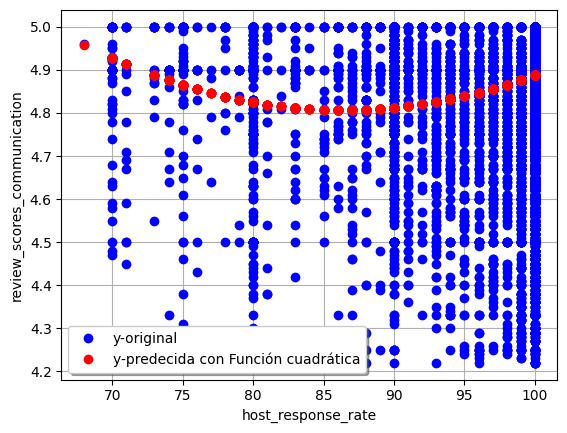

In [54]:
plt.plot(x, y, 'bo', label="y-original", color= "blue")
plt.plot(x, y_pred1,'bo', label="y-predecida con Función cuadrática", color= "red")
plt.xlabel('host_response_rate')
plt.ylabel('review_scores_communication')
plt.legend(loc='best', fancybox=True, shadow=True)
plt.grid(True)
plt.show() 

In [55]:
R2_Modelo1 = r2_score(y, y_pred1) 
R2_Modelo1 

0.01731637740585168

In [56]:
R = np.sqrt(R2_Modelo1)
R

np.float64(0.13159170720775562)

C:\Users\ajasa\AppData\Local\Temp\ipykernel_27880\3594261677.py:11: OptimizeWarning: Covariance of the parameters could not be estimated
  parametros2, covs= curve_fit(func1, df['host_response_rate'], df['estimated_occupancy_l365d'])
C:\Users\ajasa\AppData\Local\Temp\ipykernel_27880\3594261677.py:19: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(x, y, 'bo', label="y-original", color= "blue")
C:\Users\ajasa\AppData\Local\Temp\ipykernel_27880\3594261677.py:20: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(x, y_pred2,'bo', label="y-predecida con Función tangencial", color= "red")


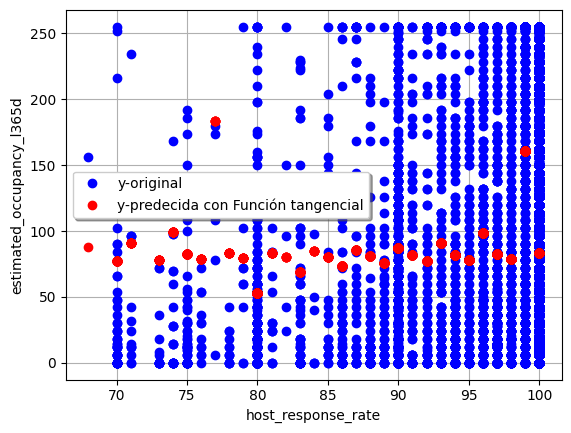

np.float64(0.13313052001828674)

In [57]:
#Función tangencial
Vars_Indep2= df[['host_response_rate']]
Var_Dep2= df['estimated_occupancy_l365d']

x= Vars_Indep2
y= Var_Dep2

def  func1 (x, a, b, c):
    return a*np.tan(x) + b

parametros2, covs= curve_fit(func1, df['host_response_rate'], df['estimated_occupancy_l365d'])

parametros2

y_pred2 = func1(x, *parametros2)

y_pred2

plt.plot(x, y, 'bo', label="y-original", color= "blue")
plt.plot(x, y_pred2,'bo', label="y-predecida con Función tangencial", color= "red")
plt.xlabel('host_response_rate')
plt.ylabel('estimated_occupancy_l365d')
plt.legend(loc='best', fancybox=True, shadow=True)
plt.grid(True)
plt.show() 

R2_Modelo2 = r2_score(y, y_pred2) 
R2_Modelo2 

R = np.sqrt(R2_Modelo2)
R

C:\Users\ajasa\AppData\Local\Temp\ipykernel_27880\2801560514.py:18: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(x, y, 'bo', label="y-original", color= "blue")
C:\Users\ajasa\AppData\Local\Temp\ipykernel_27880\2801560514.py:19: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(x, y_pred3,'bo', label="y-predecida con Función cuadrática", color= "red")


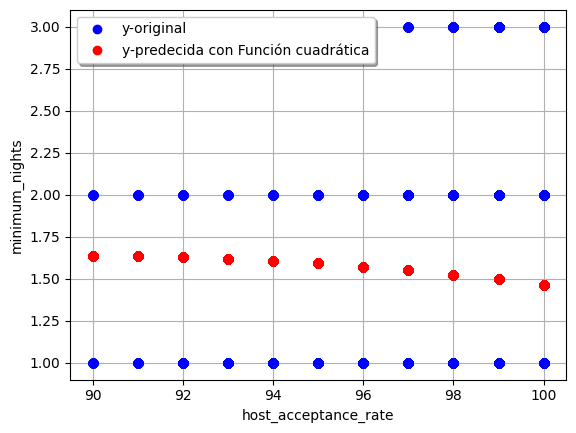

np.float64(0.061268213373940686)

In [58]:
Vars_Indep3= df[['host_acceptance_rate']]
Var_Dep3= df['minimum_nights']

x= Vars_Indep3
y= Var_Dep3

def  func1 (x, a, b, c):
     return a*x**2 + b*x + c

parametros3, covs= curve_fit(func1, df['host_acceptance_rate'], df['minimum_nights'])

parametros3

y_pred3 = func1(x, *parametros3)

y_pred3

plt.plot(x, y, 'bo', label="y-original", color= "blue")
plt.plot(x, y_pred3,'bo', label="y-predecida con Función cuadrática", color= "red")
plt.xlabel('host_acceptance_rate')
plt.ylabel('minimum_nights')
plt.legend(loc='best', fancybox=True, shadow=True)
plt.grid(True)
plt.show() 

R2_Modelo3 = r2_score(y, y_pred3) 
R2_Modelo3 

R = np.sqrt(R2_Modelo3)
R

#Top 3 correlaciones para: host_acceptance_rate
#                        Correlación
#minimum_nights            -0.060021
#minimum_minimum_nights    -0.057223

C:\Users\ajasa\AppData\Local\Temp\ipykernel_27880\4238811732.py:10: OptimizeWarning: Covariance of the parameters could not be estimated
  parametros4, covs= curve_fit(func1, df['host_acceptance_rate'], df['minimum_minimum_nights'])
C:\Users\ajasa\AppData\Local\Temp\ipykernel_27880\4238811732.py:18: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(x, y, 'bo', label="y-original", color= "blue")
C:\Users\ajasa\AppData\Local\Temp\ipykernel_27880\4238811732.py:19: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(x, y_pred4,'bo', label="y-predecida con Función senoidal", color= "red")


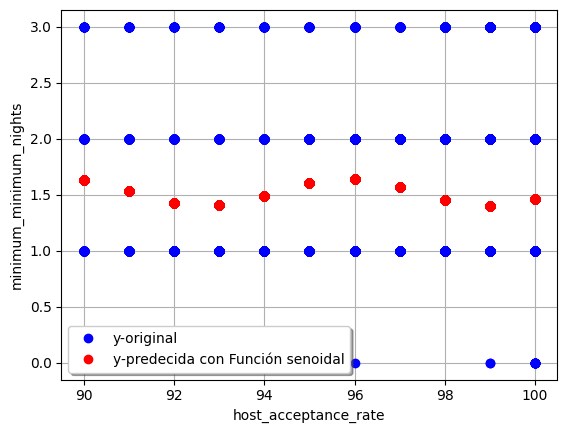

np.float64(0.07366726968800066)

In [59]:
Vars_Indep4= df[['host_acceptance_rate']]
Var_Dep4= df['minimum_minimum_nights']

x= Vars_Indep4
y= Var_Dep4

def  func1 (x, a, b, c):
     return a*np.sin(x) + b

parametros4, covs= curve_fit(func1, df['host_acceptance_rate'], df['minimum_minimum_nights'])

parametros4

y_pred4 = func1(x, *parametros4)

y_pred4

plt.plot(x, y, 'bo', label="y-original", color= "blue")
plt.plot(x, y_pred4,'bo', label="y-predecida con Función senoidal", color= "red")
plt.xlabel('host_acceptance_rate')
plt.ylabel('minimum_minimum_nights')
plt.legend(loc='best', fancybox=True, shadow=True)
plt.grid(True)
plt.show() 

R2_Modelo4 = r2_score(y, y_pred4) 
R2_Modelo4 

R = np.sqrt(R2_Modelo4)
R

#Top 3 correlaciones para: host_acceptance_rate
#                        Correlación
#minimum_nights            -0.060021
#minimum_minimum_nights    -0.057223

C:\Users\ajasa\AppData\Local\Temp\ipykernel_27880\973614138.py:21: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(x, y, 'bo', label="y-original", color="blue")
C:\Users\ajasa\AppData\Local\Temp\ipykernel_27880\973614138.py:22: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(x, y_pred5, 'bo', label="y-predecida con Función logaritmica", color="red")


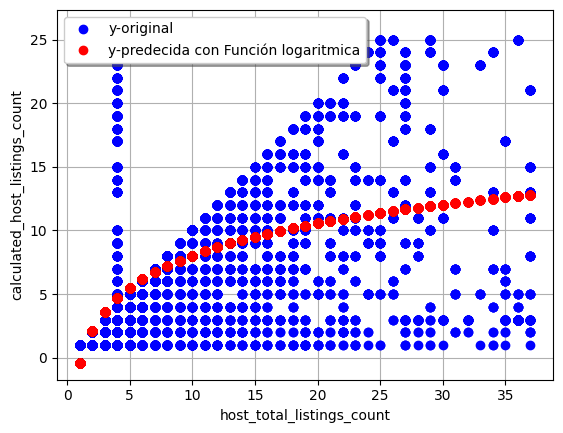

np.float64(0.6777973536455749)

In [60]:
# Filtrar valores positivos para evitar log(0) o log(valores negativos)
mask = df['host_total_listings_count'] > 0
Vars_Indep5 = df.loc[mask, ['host_total_listings_count']]
Var_Dep5 = df.loc[mask, 'calculated_host_listings_count']

x = Vars_Indep5
y = Var_Dep5

def func1(x, a, b):
    return a * np.log(x) + b

# Ajustar el modelo solo con valores válidos
parametros5, covs = curve_fit(func1, Vars_Indep5['host_total_listings_count'], Var_Dep5)

parametros5

y_pred5 = func1(x, *parametros5)

y_pred5

plt.plot(x, y, 'bo', label="y-original", color="blue")
plt.plot(x, y_pred5, 'bo', label="y-predecida con Función logaritmica", color="red")
plt.xlabel('host_total_listings_count')
plt.ylabel('calculated_host_listings_count')
plt.legend(loc='best', fancybox=True, shadow=True)
plt.grid(True)
plt.show()

R2_Modelo5 = r2_score(y, y_pred5)
R2_Modelo5

R = np.sqrt(R2_Modelo5)
R

#                                              Correlación
#calculated_host_listings_count                  0.621283
#calculated_host_listings_count_entire_homes     0.353657

C:\Users\ajasa\AppData\Local\Temp\ipykernel_27880\3930644727.py:18: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(x, y, 'bo', label="y-original", color= "blue")
C:\Users\ajasa\AppData\Local\Temp\ipykernel_27880\3930644727.py:19: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(x, y_pred6,'bo', label="y-predecida con Función cuadrática", color= "red")


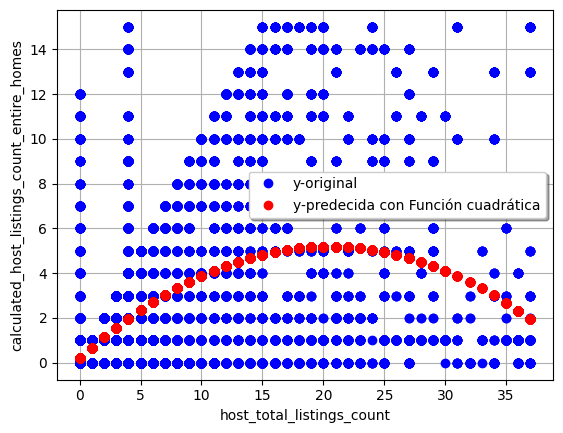

np.float64(0.4540259926382776)

In [61]:
Vars_Indep6= df[['host_total_listings_count']]
Var_Dep6= df['calculated_host_listings_count_entire_homes']

x= Vars_Indep6
y= Var_Dep6

def  func1 (x, a, b, c):
     return a*x**2 + b*x + c

parametros6, covs= curve_fit(func1, df['host_total_listings_count'], df['calculated_host_listings_count_entire_homes'])

parametros6

y_pred6 = func1(x, *parametros6)

y_pred6

plt.plot(x, y, 'bo', label="y-original", color= "blue")
plt.plot(x, y_pred6,'bo', label="y-predecida con Función cuadrática", color= "red")
plt.xlabel('host_total_listings_count')
plt.ylabel('calculated_host_listings_count_entire_homes')
plt.legend(loc='best', fancybox=True, shadow=True)
plt.grid(True)
plt.show() 

R2_Modelo6 = r2_score(y, y_pred6) 
R2_Modelo6

R = np.sqrt(R2_Modelo6)
R

#                                              Correlación
#calculated_host_listings_count                  0.621283
#calculated_host_listings_count_entire_homes     0.353657

C:\Users\ajasa\AppData\Local\Temp\ipykernel_27880\1938843970.py:19: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(x, y, 'bo', label="y-original", color= "blue")
C:\Users\ajasa\AppData\Local\Temp\ipykernel_27880\1938843970.py:20: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(x, y_pred7,'bo', label="y-predecida con Función cuadrática", color= "red")


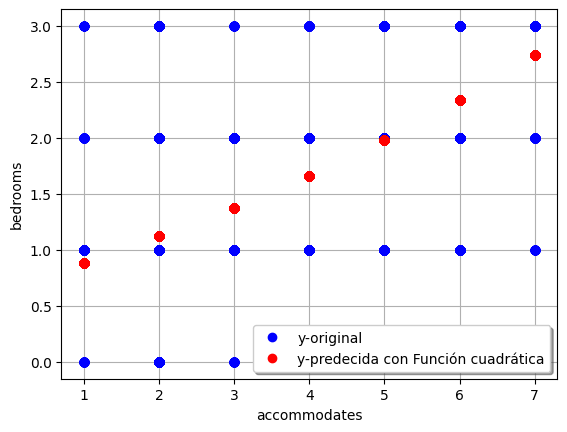

np.float64(0.6525216524585021)

In [62]:
#Función tangencial
Vars_Indep7= df[['accommodates']]
Var_Dep7= df['bedrooms']

x= Vars_Indep7
y= Var_Dep7

def  func1 (x, a, b, c):
     return a**x**2 + b*x + c

parametros7, covs= curve_fit(func1, df['accommodates'], df['bedrooms'], maxfev=10000)

parametros7

y_pred7 = func1(x, *parametros7)

y_pred7

plt.plot(x, y, 'bo', label="y-original", color= "blue")
plt.plot(x, y_pred7,'bo', label="y-predecida con Función cuadrática", color= "red")
plt.xlabel('accommodates')
plt.ylabel('bedrooms')
plt.legend(loc='best', fancybox=True, shadow=True)
plt.grid(True)
plt.show() 

R2_Modelo7 = r2_score(y, y_pred7) 
R2_Modelo7

R = np.sqrt(R2_Modelo7)
R

#bedrooms      0.649348
#beds          0.551342

C:\Users\ajasa\AppData\Local\Temp\ipykernel_27880\895777698.py:19: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(x, y, 'bo', label="y-original", color= "blue")
C:\Users\ajasa\AppData\Local\Temp\ipykernel_27880\895777698.py:20: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(x, y_pred8,'bo', label="y-predecida con Función exponencial", color= "red")


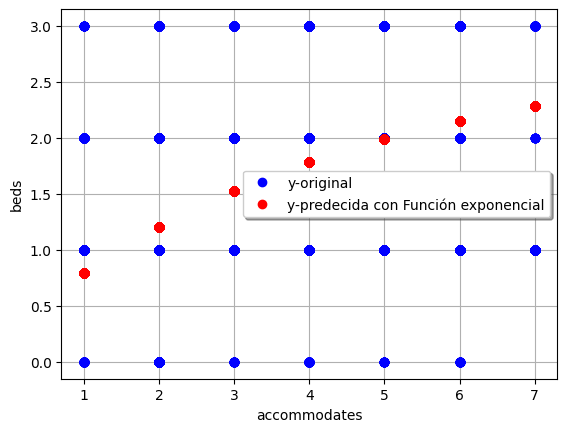

np.float64(0.5651380931162153)

In [63]:
#Función cociente entre polinomios
Vars_Indep8= df[['accommodates']]
Var_Dep8= df['beds']

x= Vars_Indep8
y= Var_Dep8

def  func1 (x, a, b, c):
     return a*np.exp(-b*x) + c

parametros8, covs= curve_fit(func1, df['accommodates'], df['beds'])

parametros8

y_pred8 = func1(x, *parametros8)

y_pred8

plt.plot(x, y, 'bo', label="y-original", color= "blue")
plt.plot(x, y_pred8,'bo', label="y-predecida con Función exponencial", color= "red")
plt.xlabel('accommodates')
plt.ylabel('beds')
plt.legend(loc='best', fancybox=True, shadow=True)
plt.grid(True)
plt.show() 

R2_Modelo8 = r2_score(y, y_pred8) 
R2_Modelo8

R = np.sqrt(R2_Modelo8)
R

#bedrooms      0.649348
#beds          0.551342

C:\Users\ajasa\AppData\Local\Temp\ipykernel_27880\2955403116.py:19: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(x, y, 'bo', label="y-original", color= "blue")
C:\Users\ajasa\AppData\Local\Temp\ipykernel_27880\2955403116.py:20: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(x, y_pred9,'bo', label="y-predecida con Función cuadrática", color= "red")


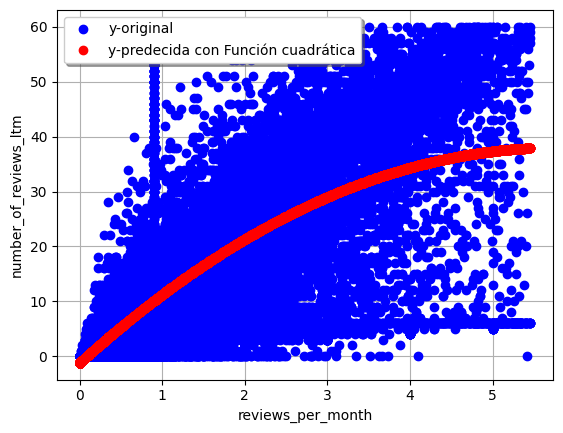

np.float64(0.7892858383287588)

In [64]:
#Función
Vars_Indep9= df[['reviews_per_month']]
Var_Dep9= df['number_of_reviews_ltm']

x= Vars_Indep9
y= Var_Dep9

def  func1 (x, a, b, c):
     return a*x**2 + b*x + c

parametros9, covs= curve_fit(func1, df['reviews_per_month'], df['number_of_reviews_ltm'], maxfev=10000)

parametros9

y_pred9 = func1(x, *parametros9)

y_pred9

plt.plot(x, y, 'bo', label="y-original", color= "blue")
plt.plot(x, y_pred9,'bo', label="y-predecida con Función cuadrática", color= "red")
plt.xlabel('reviews_per_month')
plt.ylabel('number_of_reviews_ltm')
plt.legend(loc='best', fancybox=True, shadow=True)
plt.grid(True)
plt.show() 

R2_Modelo9 = r2_score(y, y_pred9) 
R2_Modelo9

R = np.sqrt(R2_Modelo9)
R

#number_of_reviews_ltm         0.775723
#estimated_occupancy_l365d     0.751280

C:\Users\ajasa\AppData\Local\Temp\ipykernel_27880\534921607.py:19: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(x, y, 'bo', label="y-original", color= "blue")
C:\Users\ajasa\AppData\Local\Temp\ipykernel_27880\534921607.py:20: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(x, y_pred10,'bo', label="y-predecida con Función polinomial inversa", color= "red")


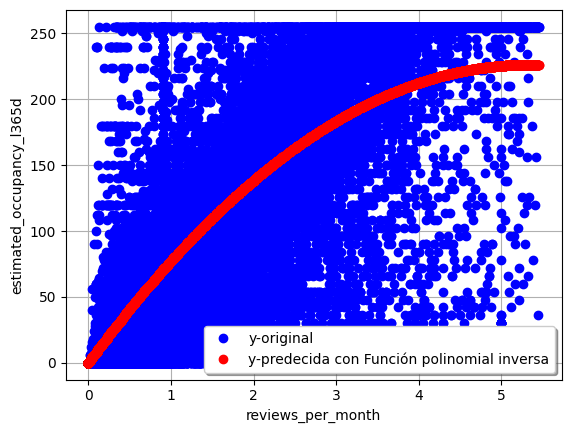

np.float64(0.7665028825639277)

In [65]:
#Función polinomial inversa
Vars_Indep10= df[['reviews_per_month']]
Var_Dep10= df['estimated_occupancy_l365d']

x= Vars_Indep10
y= Var_Dep10

def  func1 (x, a, b, c):
     return a/b*x**2 + c*x

parametros10, covs= curve_fit(func1, df['reviews_per_month'], df['estimated_occupancy_l365d'], maxfev=10000)

parametros10

y_pred10 = func1(x, *parametros10)

y_pred10

plt.plot(x, y, 'bo', label="y-original", color= "blue")
plt.plot(x, y_pred10,'bo', label="y-predecida con Función polinomial inversa", color= "red")
plt.xlabel('reviews_per_month')
plt.ylabel('estimated_occupancy_l365d')
plt.legend(loc='best', fancybox=True, shadow=True)
plt.grid(True)
plt.show() 

R2_Modelo10 = r2_score(y, y_pred10) 
R2_Modelo10

R = np.sqrt(R2_Modelo10)
R

#number_of_reviews_ltm         0.775723
#estimated_occupancy_l365d     0.751280

C:\Users\ajasa\AppData\Local\Temp\ipykernel_27880\3085805020.py:19: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(x, y, 'bo', label="y-original", color= "blue")
C:\Users\ajasa\AppData\Local\Temp\ipykernel_27880\3085805020.py:20: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(x, y_pred11,'bo', label="y-predecida con Función cuadrática", color= "red")


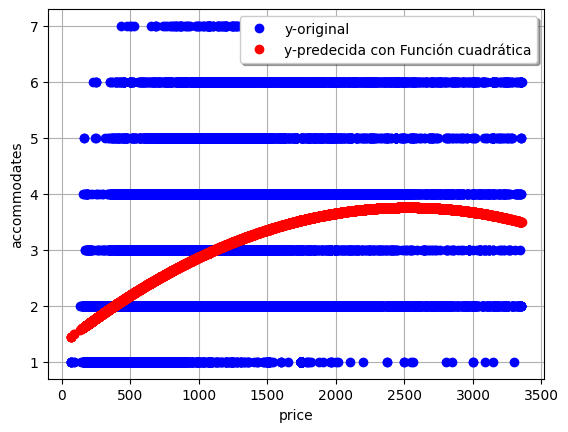

np.float64(0.3908274192517741)

In [66]:
#Función 
Vars_Indep11= df[['price']]
Var_Dep11= df['accommodates']

x= Vars_Indep11
y= Var_Dep11

def  func1 (x, a, b, c):
     return a*x**2 + b*x + c

parametros11, covs= curve_fit(func1, df['price'], df['accommodates'], maxfev=10000)

parametros11

y_pred11 = func1(x, *parametros11)

y_pred11

plt.plot(x, y, 'bo', label="y-original", color= "blue")
plt.plot(x, y_pred11,'bo', label="y-predecida con Función cuadrática", color= "red")
plt.xlabel('price')
plt.ylabel('accommodates')
plt.legend(loc='best', fancybox=True, shadow=True)
plt.grid(True)
plt.show() 

R2_Modelo11 = r2_score(y, y_pred11) 
R2_Modelo11

R = np.sqrt(R2_Modelo11)
R

#accommodates     0.361541
#bedrooms         0.354766

C:\Users\ajasa\AppData\Local\Temp\ipykernel_27880\499483796.py:19: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(x, y, 'bo', label="y-original", color= "blue")
C:\Users\ajasa\AppData\Local\Temp\ipykernel_27880\499483796.py:20: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(x, y_pred12,'bo', label="y-predecida con Función cuadrática", color= "red")


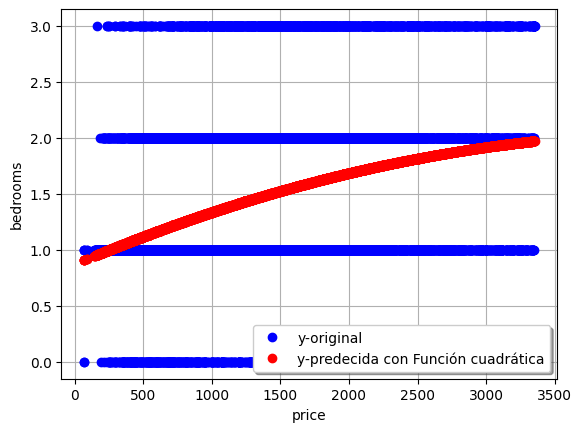

np.float64(0.3583751040394993)

In [67]:
#Función logaritmica
Vars_Indep12= df[['price']]
Var_Dep12= df['bedrooms']

x= Vars_Indep12
y= Var_Dep12

def  func1 (x, a, b, c):
     return a*x**2 + b*x + c

parametros12, covs= curve_fit(func1, df['price'], df['bedrooms'], maxfev=10000)

parametros12

y_pred12 = func1(x, *parametros12)

y_pred12

plt.plot(x, y, 'bo', label="y-original", color= "blue")
plt.plot(x, y_pred12,'bo', label="y-predecida con Función cuadrática", color= "red")
plt.xlabel('price')
plt.ylabel('bedrooms')
plt.legend(loc='best', fancybox=True, shadow=True)
plt.grid(True)
plt.show() 

R2_Modelo12 = r2_score(y, y_pred12) 
R2_Modelo12

R = np.sqrt(R2_Modelo12)
R

#accommodates     0.361541
#bedrooms         0.354766

In [70]:
import re, numpy as np, pandas as pd

# --- limpieza ligera de nombres (evitar espacios finales) ---
df.columns = df.columns.str.strip()
try:
    Mex_corr.columns = Mex_corr.columns.str.strip()
    Mex_corr.index   = Mex_corr.index.str.strip()
except Exception:
    pass

# ========= 1) Recolectar R² de R2_Modelo1..12 =========
r2_items = []
for name, val in globals().items():
    m = re.match(r"^R2_Modelo(\d+)$", name)
    if m and isinstance(val, (float, int, np.floating, np.integer)):
        r2_items.append((int(m.group(1)), float(val)))
# asegurar del 1 al 12
for i in range(1, 13):
    v = globals().get(f"R2_Modelo{i}")
    if v is not None and (i, float(v)) not in r2_items:
        r2_items.append((i, float(v)))

df_r2 = (pd.DataFrame(r2_items, columns=["Modelo", "R2"])
         .drop_duplicates(subset=["Modelo"])
         .sort_values("Modelo")
         .reset_index(drop=True))
df_r2["R"] = np.where(df_r2["R2"] >= 0, np.sqrt(df_r2["R2"]), np.nan)

# ========= 2) Mapeo de relaciones que pediste =========
model_to_pair = {
    1: ("host_response_rate", "review_scores_communication"),
    2: ("host_response_rate", "estimated_occupancy_l365d"),

    3: ("host_acceptance_rate", "minimum_nights"),
    4: ("host_acceptance_rate", "minimum_minimum_nights"),

    5: ("host_total_listings_count", "calculated_host_listings_count"),
    6: ("host_total_listings_count", "calculated_host_listings_count_entire_homes"),

    7: ("accommodates", "bedrooms"),
    8: ("accommodates", "beds"),

    9: ("reviews_per_month", "number_of_reviews_ltm"),
    10: ("reviews_per_month", "estimated_occupancy_l365d"),

    11: ("price", "accommodates"),
    12: ("price", "bedrooms")
}

# ========= 3) Añadir columnas de relación y correlación lineal =========
def corr_lineal(xcol, ycol):
    # intenta tomarla de la matriz ya calculada; si no, calcúlala rápido desde df
    try:
        if xcol in Mex_corr.columns and ycol in Mex_corr.columns:
            return float(Mex_corr.loc[xcol, ycol])
    except Exception:
        pass
    if xcol in df.columns and ycol in df.columns:
        s = df[[xcol, ycol]].astype(float)
        s = s.replace([np.inf, -np.inf], np.nan).dropna()
        if len(s) >= 2:
            return float(s.corr(method="pearson").iloc[0, 1])
    return np.nan

# Añadir columnas 'X' y 'Y' usando el mapeo model_to_pair
df_r2[["X", "Y"]] = df_r2["Modelo"].map(model_to_pair).apply(pd.Series)

df_r2["Relación"] = df_r2.apply(lambda r: f"{r['X']} vs {r['Y']}", axis=1)

df_r2["Corr_lineal"] = df_r2.apply(lambda r: corr_lineal(r["X"], r["Y"]), axis=1)

df_r2["Aceptado"] = df_r2.apply(
    lambda r: "Sí" if pd.notnull(r["R"]) and pd.notnull(r["Corr_lineal"]) and r["R"] > abs(r["Corr_lineal"]) else "No",
    axis=1
)

# Redondear para mejor lectura
df_r2[["R2","R","Corr_lineal"]] = df_r2[["R2","R","Corr_lineal"]].round(3)

# Orden final de columnas
df_r2 = df_r2[["Modelo", "Relación", "Corr_lineal", "R","R2", "Aceptado"]]

print(df_r2)


    Modelo                                           Relación  Corr_lineal  \
0        1  host_response_rate vs review_scores_communication        0.094   
1        2    host_response_rate vs estimated_occupancy_l365d        0.070   
2        3             host_acceptance_rate vs minimum_nights       -0.060   
3        4     host_acceptance_rate vs minimum_minimum_nights       -0.057   
4        5  host_total_listings_count vs calculated_host_l...        0.621   
5        6  host_total_listings_count vs calculated_host_l...        0.354   
6        7                           accommodates vs bedrooms        0.649   
7        8                               accommodates vs beds        0.551   
8        9         reviews_per_month vs number_of_reviews_ltm        0.776   
9       10     reviews_per_month vs estimated_occupancy_l365d        0.751   
10      11                              price vs accommodates        0.362   
11      12                                  price vs bedrooms   